In [24]:
import numpy as np
from scipy.optimize import minimize
from scipy import integrate
import scipy.constants as c

import matplotlib.pyplot as pl
%matplotlib inline

In [42]:
m = c.m_e
T = 6e6
s = 2
lam = c.h/np.sqrt(2*np.pi*c.k*T)
rho0 = 325*(s)

def F(z, degree):
    integrand = lambda w: (w**(degree))/((np.exp(w)/z) + 1)
    value, error = integrate.quad(integrand, a=0, b=np.inf)
    return value

def P(z):
    return c.k*T*(4*(2*s+1)/(3*np.sqrt(np.pi)*(lam**3)))*F(z, 1.5)

def rho(z):
    return (2*m*(2*s+1)/(np.sqrt(np.pi)*(lam**3)))*F(z, 0.5)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


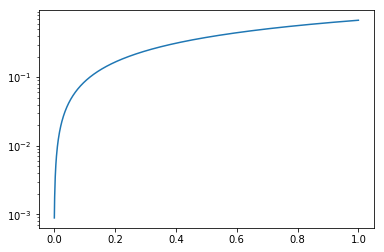

In [56]:
z = np.linspace(0, 1, 1000)
#pl.plot(z, [P(z) for z in z])
pl.semilogy(z, [F(z, 0.5) for z in z])

In [75]:
[np.sum(np.sort(np.floor(6*np.random.rand(4)+1))[1:]) for t in range(6)]

[15.0, 9.0, 16.0, 13.0, 11.0, 16.0]